<a href="https://colab.research.google.com/github/scottthomaswx/OutlookPlotter/blob/main/Outlook_Plotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install geopandas
!pip install metpy
!pip install matplotlib
!pip install cartopy
!pip install pandas
import geopandas
import metpy
from metpy.plots import PlotGeometry
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from metpy.plots import USCOUNTIES
import matplotlib.patches as mpatches

Times for Outlook Issuances. For archived

Day                | SPC Convective                    | SPC Fire | WPC Excessive Rain
-------------------|-----------------------------------|---------|-------------------
Day 1              | 1200 (6z), 1300, 1630, 2000, 0100 | 1200 (4AM), 1700         | 0100, 0830, 16000
Day 2              | 0630, 1730                        | 1000, 2000        | 0830 and 2030
Day 3              | 0730                              | 2200       | 0830 and 2030
Day 4              | 0400 CT                           | 2200 | 0530 and 1730
Day 5              | 0400 CT                           | 2200| 0530 and 1730
Day 6-8            | 0400 CT                           | 2200| 0530 and 1730

In [3]:
# @markdown ### Day and Month Must Have 2 Digits
year = '2021' # @param {type:"string"}
month = '05' # @param {type:"string"}
day = '10' # @param {type:"string"}
outlookday = '1' # @param {type:"string"}
time = '2000' # @param {type:"string"}

WestLong = -105 # @param {type:"integer"}
EastLong = -95 # @param {type:"integer"}
NorthLat = 37 # @param {type:"integer"}
SouthLat = 27 # @param {type:"integer"}

variable = 'SPC Archive SVR D1-2' # @param ["SPC Archive SVR D1-2", "SPC Realtime SVR D1-2", "WPC Realtime Excessive Rain", "SPC Archive SVR D3", "SPC Realtime SVR D3", "SPC Archive SVR D4-8", "SPC Realtime SVR D4-8", "SPC Realtime Fire D1-2", "SPC Archive Fire D1-2", "SPC Archive D3-8", "SPC Realtime D3-8"]


In [4]:
if variable == 'SPC Archive SVR D1-2':
  catoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day{outlookday}otlk_{year}{month}{day}_{time}_cat.nolyr.geojson')
  windoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day{outlookday}otlk_{year}{month}{day}_{time}_wind.nolyr.geojson')
  hailoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day{outlookday}otlk_{year}{month}{day}_{time}_hail.nolyr.geojson')
  sighailoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day{outlookday}otlk_{year}{month}{day}_{time}_sighail.nolyr.geojson')
  toroutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day{outlookday}otlk_{year}{month}{day}_{time}_torn.nolyr.geojson')
  sigtoroutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day{outlookday}otlk_{year}{month}{day}_{time}_sigtorn.nolyr.geojson')
  sigwindoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day{outlookday}otlk_{year}{month}{day}_{time}_sigwind.nolyr.geojson')
elif variable == 'SPC Realtime SVR D1-2':
  catoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/day{outlookday}otlk_cat.nolyr.geojson')
  windoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/day{outlookday}otlk_wind.lyr.geojson')
  hailoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/day{outlookday}otlk_hail.lyr.geojson')
  toroutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/day{outlookday}otlk_torn.lyr.geojson')
  sigwindoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/day{outlookday}otlk_sigwind.lyr.geojson')
  sighailoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/day{outlookday}otlk_sighail.lyr.geojson')
  sigtoroutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/day{outlookday}otlk_sigtorn.lyr.geojson')
elif variable == 'WPC Realtime Excessive Rain':
  catoutlook = geopandas.read_file(f'https://www.wpc.ncep.noaa.gov/exper/eromap/geojson/Day{outlookday}_Latest.geojson')
elif variable == "SPC Realtime SVR D3":
  catoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/day{outlookday}otlk_cat.nolyr.geojson')
  proboutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/day{outlookday}otlk_prob.nolyr.geojson')
  sigproboutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/day{outlookday}otlk_sigprob.nolyr.geojson')
elif variable == "SPC Archive SVR D3":
  catoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day{outlookday}otlk_{year}{month}{day}_{time}_cat.nolyr.geojson')
  proboutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day{outlookday}otlk_{year}{month}{day}_{time}_prob.nolyr.geojson')
  sigproboutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day{outlookday}otlk_{year}{month}{day}_{time}_sigprob.nolyr.geojson')
elif variable == 'SPC Realtime SVR D4-8':
  catoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/exper/day4-8/day{outlookday}prob.nolyr.geojson')
elif variable == 'SPC Archive SVR D4-8':
  outlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/exper/day4-8/archive/{year}/day{outlookday}prob_{year}{month}{day}.nolyr.geojson')
elif variable == 'SPC Realtime Fire D1-2':
  rhoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/fire_wx/day{outlookday}fw_windrh.nolyr.geojson')
  drytoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/fire_wx/day{outlookday}fw_dryt.nolyr.geojson')
elif variable == 'SPC Archive Fire D1-2':
  drytoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/fire_wx/{year}/day{outlookday}fw_{year}{month}{day}_{time}_dryt.nolyr.geojson')
  rhoutlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/fire_wx/{year}/day{outlookday}fw_{year}{month}{day}_{time}_windrh.nolyr.geojson')

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


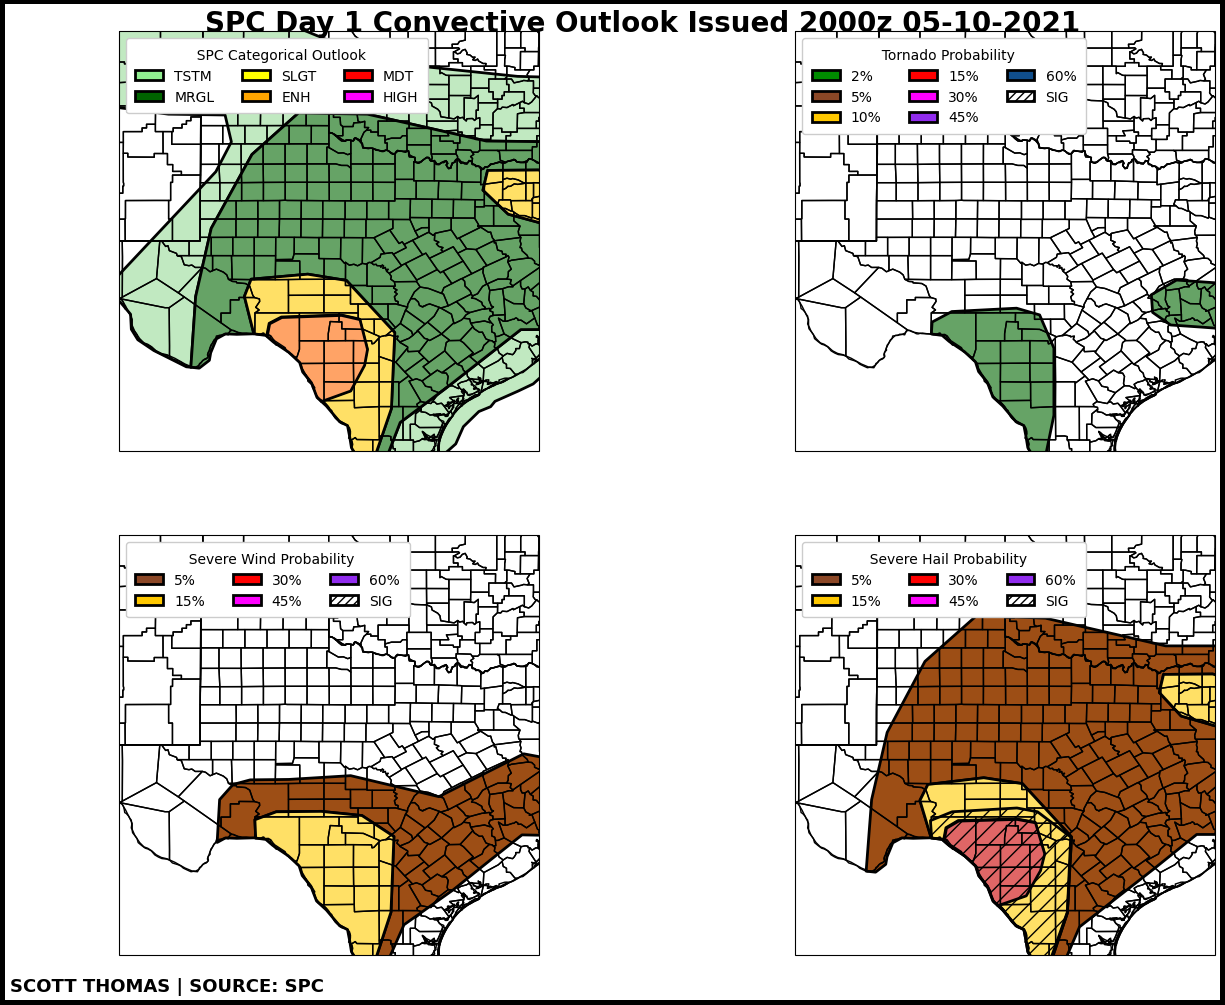

In [5]:
if variable == "SPC Realtime SVR D1-2" or variable == "SPC Archive SVR D1-2":
  fig = plt.figure(figsize=(16, 12), facecolor='white', edgecolor="black", linewidth =6)
  ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
  try:
    ax1.add_geometries(catoutlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[0], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[1], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[2], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[3], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[4], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[5], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[6], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[7], edgecolor='black', linewidth=2)
  except:
    pass
  TSTM = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='lightgreen')
  MRGL = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='darkgreen')
  SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
  ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
  MODT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='red')
  HIGH = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='magenta')
  ax1.coastlines(color='black',resolution='10m',zorder=99)
  ax1.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='gray', zorder=9)
  ax1.legend([TSTM, MRGL, SLGT, ENHC, MODT, HIGH], ['TSTM', 'MRGL', 'SLGT', 'ENH', 'MDT', 'HIGH'],
            loc='upper left', fontsize=10, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
            labelcolor='k', borderpad=0.7,
            title='  SPC Categorical Outlook', title_fontsize=10).set_zorder(10)
  ax1.set_extent((WestLong, EastLong, SouthLat, NorthLat))

  ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
  try:
    ax2.add_geometries(toroutlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=toroutlook.fill[0], edgecolor='black', linewidth=2)
    if toroutlook.LABEL[1] != 'SIGN':
      ax2.add_geometries(toroutlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=toroutlook.fill[1], edgecolor='black', linewidth=2)
    if toroutlook.LABEL[2] != 'SIGN':
      ax2.add_geometries(toroutlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=toroutlook.fill[2], edgecolor='black', linewidth=2)
    if toroutlook.LABEL[3] != 'SIGN':
      ax2.add_geometries(toroutlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=toroutlook.fill[3], edgecolor='black', linewidth=2)
    if toroutlook.LABEL[4] != 'SIGN':
      ax2.add_geometries(toroutlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=toroutlook.fill[4], edgecolor='black', linewidth=2)
    if toroutlook.LABEL[5] != 'SIGN':
      ax2.add_geometries(toroutlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=toroutlook.fill[5], edgecolor='black', linewidth=2)
    if toroutlook.LABEL[6] != 'SIGN':
      ax2.add_geometries(toroutlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=toroutlook.fill[6], edgecolor='black', linewidth=2)
    if toroutlook.LABEL[7] != 'SIGN':
      ax2.add_geometries(toroutlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=toroutlook.fill[7], edgecolor='black', linewidth=2)
  except:
    pass
  try:
    ax2.add_geometries(sigtoroutlook.geometry[0], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
    ax2.add_geometries(sigtoroutlook.geometry[1], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
    ax2.add_geometries(sigtoroutlook.geometry[2], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
  except:
    pass
  TWO = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#008b00')
  FIVE = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#8b4726')
  TEN = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ffc800')
  FIFT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ff0000')
  THRT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ff00ff')
  FRFV = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#912cee')
  SXTY = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#104e8b')
  SIG = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', hatch = '////', facecolor = 'none')
  ax2.coastlines(color='black',resolution='10m',zorder=99)
  ax2.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
  ax2.add_feature(USCOUNTIES, facecolor='None', edgecolor='gray', zorder=9)
  ax2.legend([TWO, FIVE, TEN, FIFT, THRT, FRFV, SXTY, SIG], ['2%', '5%', '10%', '15%', '30%', '45%', '60%', 'SIG'],
            loc='upper left', fontsize=10, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
            labelcolor='k', borderpad=0.7,
            title='  Tornado Probability', title_fontsize=10).set_zorder(10)
  ax2.set_extent((WestLong, EastLong, SouthLat, NorthLat))

  ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
  try:
    ax3.add_geometries(windoutlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=windoutlook.fill[0], edgecolor='black', linewidth=2)
    if windoutlook.LABEL[1] != 'SIGN':
      ax3.add_geometries(windoutlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=windoutlook.fill[1], edgecolor='black', linewidth=2)
    if windoutlook.LABEL[2] != 'SIGN':
      ax3.add_geometries(windoutlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=windoutlook.fill[2], edgecolor='black', linewidth=2)
    if windoutlook.LABEL[3] != 'SIGN':
      ax3.add_geometries(windoutlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=windoutlook.fill[3], edgecolor='black', linewidth=2)
    if windoutlook.LABEL[4] != 'SIGN':
      ax3.add_geometries(windoutlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=windoutlook.fill[4], edgecolor='black', linewidth=2)
    if windoutlook.LABEL[5] != 'SIGN':
      ax3.add_geometries(windoutlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=windoutlook.fill[5], edgecolor='black', linewidth=2)
    if windoutlook.LABEL[6] != 'SIGN':
      ax3.add_geometries(windoutlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=windoutlook.fill[6], edgecolor='black', linewidth=2)
    if windoutlook.LABEL[7] != 'SIGN':
      ax3.add_geometries(windoutlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=windoutlook.fill[7], edgecolor='black', linewidth=2)
  except:
    pass
  try:
    ax3.add_geometries(sigwindoutlook.geometry[0], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
    ax3.add_geometries(sigwindoutlook.geometry[1], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
    ax3.add_geometries(sigwindoutlook.geometry[2], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
  except:
    pass
  FIVE = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#8b4726')
  FIFT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ffc800')
  THRT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ff0000')
  FRFV = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ff00ff')
  SXTY = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#912cee')
  SIG = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', hatch = '////', facecolor = 'none')
  ax3.coastlines(color='black',resolution='10m',zorder=99)
  ax3.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
  ax3.add_feature(USCOUNTIES, facecolor='None', edgecolor='gray', zorder=9)
  ax3.legend([FIVE, FIFT, THRT, FRFV, SXTY, SIG], ['5%', '15%', '30%', '45%', '60%', 'SIG'],
            loc='upper left', fontsize=10, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
            labelcolor='k', borderpad=0.7,
            title='  Severe Wind Probability', title_fontsize=10).set_zorder(10)
  ax3.set_extent((WestLong, EastLong, SouthLat, NorthLat))

  ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
  try:
    ax4.add_geometries(hailoutlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=hailoutlook.fill[0], edgecolor='black', linewidth=2)
    if hailoutlook.LABEL[1] != 'SIGN':
      ax4.add_geometries(hailoutlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=hailoutlook.fill[1], edgecolor='black', linewidth=2)
    if hailoutlook.LABEL[2] != 'SIGN':
      ax4.add_geometries(hailoutlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=hailoutlook.fill[2], edgecolor='black', linewidth=2)
    if hailoutlook.LABEL[3] != 'SIGN':
      ax4.add_geometries(hailoutlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=hailoutlook.fill[3], edgecolor='black', linewidth=2)
    if hailoutlook.LABEL[4] != 'SIGN':
      ax4.add_geometries(hailoutlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=hailoutlook.fill[4], edgecolor='black', linewidth=2)
    if hailoutlook.LABEL[5] != 'SIGN':
      ax4.add_geometries(hailoutlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=hailoutlook.fill[5], edgecolor='black', linewidth=2)
    if hailoutlook.LABEL[6] != 'SIGN':
      ax4.add_geometries(hailoutlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=hailoutlook.fill[6], edgecolor='black', linewidth=2)
    if hailoutlook.LABEL[7] != 'SIGN':
      ax4.add_geometries(hailoutlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=hailoutlook.fill[7], edgecolor='black', linewidth=2)
  except:
    pass
  try:
    ax4.add_geometries(sighailoutlook.geometry[0], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
    ax4.add_geometries(sighailoutlook.geometry[1], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
    ax4.add_geometries(sighailoutlook.geometry[2], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
  except:
    pass
  FIVE = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#8b4726')
  FIFT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ffc800')
  THRT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ff0000')
  FRFV = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ff00ff')
  SXTY = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#912cee')
  SIG = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', hatch = '////', facecolor = 'none')
  ax4.coastlines(color='black',resolution='10m',zorder=99)
  ax4.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
  ax4.add_feature(USCOUNTIES, facecolor='None', edgecolor='gray', zorder=9)
  ax4.legend([FIVE, FIFT, THRT, FRFV, SXTY, SIG], ['5%', '15%', '30%', '45%', '60%', 'SIG'],
            loc='upper left', fontsize=10, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
            labelcolor='k', borderpad=0.7,
            title='  Severe Hail Probability', title_fontsize=10).set_zorder(10)
  ax4.set_extent((WestLong, EastLong, SouthLat, NorthLat))

  plt.figtext(0.50, 0.88, f'SPC Day {outlookday} Convective Outlook Issued {time}z {month}-{day}-{year} ', ha='center', weight='bold', fontsize=20)
  plt.figtext(0.20, 0.08, f'SCOTT THOMAS | SOURCE: SPC', weight='bold', color='black', fontsize=13, ha='center')
  plt.savefig(f'SPC_D{outlookday}_ConvectiveOutlook_{year}_{month}_{day}_{time}.png', bbox_inches = 'tight')

if variable == "WPC Realtime Excessive Rain":
  fig = plt.figure(figsize=(16, 12), facecolor='white', edgecolor="black", linewidth =6)
  ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
  i = catoutlook['OUTLOOK']
  color = []
  q = 0
  while q < len(i):
      if i[q] == 'Marginal (At Least 5%)':
          color.append('Green')
      elif i[q] == 'Slight (At Least 15%)':
          color.append('Yellow')
      elif i[q] == 'Moderate (At Least 40%)':
          color.append('Red')
      elif i[q] == 'High (At Least 70%)':
          color.append('deeppink')
      q+=1
  catoutlook['fill'] = color
  try:
    ax1.add_geometries(catoutlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[0], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[1], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[2], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[3], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[4], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[5], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[6], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[7], edgecolor='black', linewidth=2)
  except:
    pass
  MRGL = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='darkgreen')
  SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
  MODT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='red')
  HIGH = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='magenta')
  ax1.coastlines(color='black',resolution='10m',zorder=99)
  ax1.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='gray', zorder=9)
  ax1.legend([MRGL, SLGT, MODT, HIGH], ['MRGL', 'SLGT', 'MDT', 'HIGH'],
            loc='upper left', fontsize=12, facecolor='white', markerscale=12, ncol=3, framealpha=1.0,
            labelcolor='k', borderpad=0.7,
            title=' Excessive Rainfall Outlook', title_fontsize=12).set_zorder(10)
  ax1.set_extent((WestLong, EastLong, SouthLat, NorthLat))
  plt.figtext(0.50, 0.88, f'WPC Day {outlookday} Excessive Rainfall Outlook Issued {time}z {month}-{day}-{year} ', ha='center', weight='bold', fontsize=20)
  plt.figtext(0.22, 0.10, f'SCOTT THOMAS | SOURCE: WPC', weight='bold', color='black', fontsize=13, ha='center')
  plt.savefig(f'WPC_D{outlookday}_ExcessiveRainfallOutlook_{year}_{month}_{day}_{time}.png', bbox_inches = 'tight')


if variable == "SPC Realtime SVR D3" or variable == "SPC Archive SVR D3":
  fig = plt.figure(figsize=(16, 12), facecolor='white', edgecolor="black", linewidth =6)
  ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
  try:
    ax1.add_geometries(catoutlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[0], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[1], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[2], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[3], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[4], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[5], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[6], edgecolor='black', linewidth=2)
    ax1.add_geometries(catoutlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=catoutlook.fill[7], edgecolor='black', linewidth=2)
  except:
    pass
  TSTM = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='lightgreen')
  MRGL = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='darkgreen')
  SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
  ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
  MODT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='red')
  ax1.coastlines(color='black',resolution='10m',zorder=99)
  ax1.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='gray', zorder=9)
  ax1.legend([TSTM, MRGL, SLGT, ENHC, MODT], ['TSTM', 'MRGL', 'SLGT', 'ENH', 'MDT'],
            loc='upper left', fontsize=10, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
            labelcolor='k', borderpad=0.7,
            title='  SPC Categorical Outlook', title_fontsize=10).set_zorder(10)
  ax1.set_extent((WestLong, EastLong, SouthLat, NorthLat))

  ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
  try:
    ax2.add_geometries(proboutlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=proboutlook.fill[0], edgecolor='black', linewidth=2)
    if windoutlook.LABEL[1] != 'SIGN':
      ax2.add_geometries(proboutlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=proboutlook.fill[1], edgecolor='black', linewidth=2)
    if proboutlook.LABEL[2] != 'SIGN':
      ax2.add_geometries(proboutlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=proboutlook.fill[2], edgecolor='black', linewidth=2)
    if proboutlook.LABEL[3] != 'SIGN':
      ax2.add_geometries(proboutlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=proboutlook.fill[3], edgecolor='black', linewidth=2)
    if proboutlook.LABEL[4] != 'SIGN':
      ax2.add_geometries(proboutlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=proboutlook.fill[4], edgecolor='black', linewidth=2)
    if proboutlook.LABEL[5] != 'SIGN':
      ax2.add_geometries(proboutlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=proboutlook.fill[5], edgecolor='black', linewidth=2)
    if proboutlook.LABEL[6] != 'SIGN':
      ax2.add_geometries(proboutlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=proboutlook.fill[6], edgecolor='black', linewidth=2)
    if proboutlook.LABEL[7] != 'SIGN':
      ax2.add_geometries(proboutlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=proboutlook.fill[7], edgecolor='black', linewidth=2)
  except:
    pass
  try:
    ax2.add_geometries(sigproboutlook.geometry[0], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
    ax2.add_geometries(sigproboutlook.geometry[1], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
    ax2.add_geometries(sigproboutlook.geometry[2], hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree())
  except:
    pass
  FIVE = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#8b4726')
  FIFT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ffc800')
  THRT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ff0000')
  FRFV = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='#ff00ff')
  SIG = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', hatch = '////', facecolor = 'none')
  ax2.coastlines(color='black',resolution='10m',zorder=99)
  ax2.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
  ax2.add_feature(USCOUNTIES, facecolor='None', edgecolor='gray', zorder=9)
  ax2.legend([FIVE, FIFT, THRT, FRFV, SIG], ['5%', '15%', '30%', '45%', 'SIG'],
            loc='upper left', fontsize=10, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
            labelcolor='k', borderpad=0.7,
            title='  Severe Weather Probability', title_fontsize=10).set_zorder(10)
  ax2.set_extent((WestLong, EastLong, SouthLat, NorthLat))
  plt.figtext(0.50, 0.88, f'WPC Day {outlookday} Excessive Rainfall Outlook Issued {time}z {month}-{day}-{year} ', ha='center', weight='bold', fontsize=20)
  plt.figtext(0.22, 0.10, f'SCOTT THOMAS | SOURCE: WPC', weight='bold', color='black', fontsize=13, ha='center')
  plt.savefig(f'SPC_D{outlookday}_ConvectiveOutlook_{year}_{month}_{day}_{time}.png', bbox_inches = 'tight')

if variable == "SPC Realtime SVR D4-8" or variable == "SPC Archive SVR D4-8":
  fig = plt.figure(figsize=(16, 12), facecolor='white', edgecolor="black", linewidth =6)
  ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
  try:
    ax1.add_geometries(outlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=outlook.fill[0], edgecolor='black', linewidth=2)
    ax1.add_geometries(outlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=outlook.fill[1], edgecolor='black', linewidth=2)
    ax1.add_geometries(outlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=outlook.fill[2], edgecolor='black', linewidth=2)
    ax1.add_geometries(outlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=outlook.fill[3], edgecolor='black', linewidth=2)
    ax1.add_geometries(outlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=outlook.fill[4], edgecolor='black', linewidth=2)
    ax1.add_geometries(outlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=outlook.fill[5], edgecolor='black', linewidth=2)
    ax1.add_geometries(outlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=outlook.fill[6], edgecolor='black', linewidth=2)
    ax1.add_geometries(outlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=outlook.fill[7], edgecolor='black', linewidth=2)
  except:
    pass
  SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
  ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
  ax1.coastlines(color='black',resolution='10m',zorder=99)
  ax1.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='gray', zorder=9)
  ax1.legend([SLGT, ENHC], ['15%', '30%'],
            loc='upper left', fontsize=15, facecolor='white', markerscale=15, ncol=3, framealpha=1.0,
            labelcolor='k', borderpad=0.7,
            title='  SPC Categorical Outlook', title_fontsize=15).set_zorder(10)
  ax1.set_extent((WestLong, EastLong, SouthLat, NorthLat))
  plt.figtext(0.50, 0.88, f'SPC Day {outlookday} Convective Outlook Issued {time}z {month}-{day}-{year} ', ha='center', weight='bold', fontsize=20)
  plt.figtext(0.22, 0.10, f'SCOTT THOMAS | SOURCE: SPC', weight='bold', color='black', fontsize=13, ha='center')
  plt.savefig(f'SPC_D{outlookday}_ConvectiveOutlook_{year}_{month}_{day}_{time}.png', bbox_inches = 'tight')

if variable == "SPC Realtime Fire D1-2" or variable == "SPC Archive Fire D1-2":
  fig = plt.figure(figsize=(16, 12), facecolor='white', edgecolor="black", linewidth =6)
  ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
  try:
    ax1.add_geometries(rhoutlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=rhoutlook.fill[0], edgecolor='black', linewidth=2)
    ax1.add_geometries(rhoutlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=rhoutlook.fill[1], edgecolor='black', linewidth=2)
    ax1.add_geometries(rhoutlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=rhoutlook.fill[2], edgecolor='black', linewidth=2)
    ax1.add_geometries(rhoutlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=rhoutlook.fill[3], edgecolor='black', linewidth=2)
    ax1.add_geometries(rhoutlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=rhoutlook.fill[4], edgecolor='black', linewidth=2)
    ax1.add_geometries(rhoutlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=rhoutlook.fill[5], edgecolor='black', linewidth=2)
    ax1.add_geometries(rhoutlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=rhoutlook.fill[6], edgecolor='black', linewidth=2)
    ax1.add_geometries(rhoutlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=rhoutlook.fill[7], edgecolor='black', linewidth=2)
  except:
    pass
  try:
      ax1.add_geometries(drytoutlook.geometry[0],  hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree(), edgecolor =drytoutlook.fill[0])
      ax1.add_geometries(drytoutlook.geometry[1],  hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree(), edgecolor =drytoutlook.fill[1])
      ax1.add_geometries(drytoutlook.geometry[2],  hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree(), edgecolor =drytoutlook.fill[2])
      ax1.add_geometries(drytoutlook.geometry[3],  hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree(), edgecolor =drytoutlook.fill[3])
      ax1.add_geometries(drytoutlook.geometry[4],  hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree(), edgecolor =drytoutlook.fill[4])
      ax1.add_geometries(drytoutlook.geometry[5],  hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree(), edgecolor =drytoutlook.fill[5])
      ax1.add_geometries(drytoutlook.geometry[6],  hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree(), edgecolor =drytoutlook.fill[6])
      ax1.add_geometries(drytoutlook.geometry[7],  hatch='//', facecolor="none", linewidth=2, alpha=1, zorder=4.5, crs=ccrs.PlateCarree(), edgecolor =drytoutlook.fill[7])
  except:
    pass
  ELEV = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='#ffbf7f', facecolor='none')
  CRIT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='#ff7f7f', facecolor='none')
  ECRIT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='#ff7fff', facecolor='none')
  ISOT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='#c5a392', hatch = '////', facecolor = 'none')
  SCTT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='#ff7f7f', hatch = '////', facecolor = 'none')
  ax1.coastlines(color='black',resolution='10m',zorder=99)
  ax1.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='gray', zorder=9)
  ax1.legend([ELEV, CRIT, ECRIT, ISOT, SCTT], ['Elevated', 'Critical', 'Extremely Critical', 'Isolated Dry Tstms', 'Sct Dry Tstms'],
            loc='upper left', fontsize=15, facecolor='white', markerscale=15, ncol=3, framealpha=1.0,
            labelcolor='k', borderpad=0.7,
            title='  SPC Fire Weather Outlook', title_fontsize=15).set_zorder(10)
  ax1.set_extent((WestLong, EastLong, SouthLat, NorthLat))
  plt.figtext(0.50, 0.88, f'SPC Day {outlookday} Fire Weather Outlook Issued {time}z {month}-{day}-{year} ', ha='center', weight='bold', fontsize=20)
  plt.figtext(0.22, 0.10, f'SCOTT THOMAS | SOURCE: SPC', weight='bold', color='black', fontsize=13, ha='center')
  plt.savefig(f'SPC_D{outlookday}_FireOutlook_{year}_{month}_{day}_{time}.png', bbox_inches = 'tight')
